# Descriptive Analytics for Fraud Detection

## "An outlying observation, or outlier, is one that appears to deviate markedly from other members of the sample in which it occurs.”

As first of the many descriptions of an outlier as provided by Grubbs (1969) perfectly gives us the perfect start for descriptive analytics!

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, classification_report

from sklearn.manifold import TSNE

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [235]:
#importing Data
df = pd.read_csv("creditcard.csv")

In [236]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

### BoxPlots: 
We get to know the Mean, Median, Mode Statistical visualization in this above Boxplots

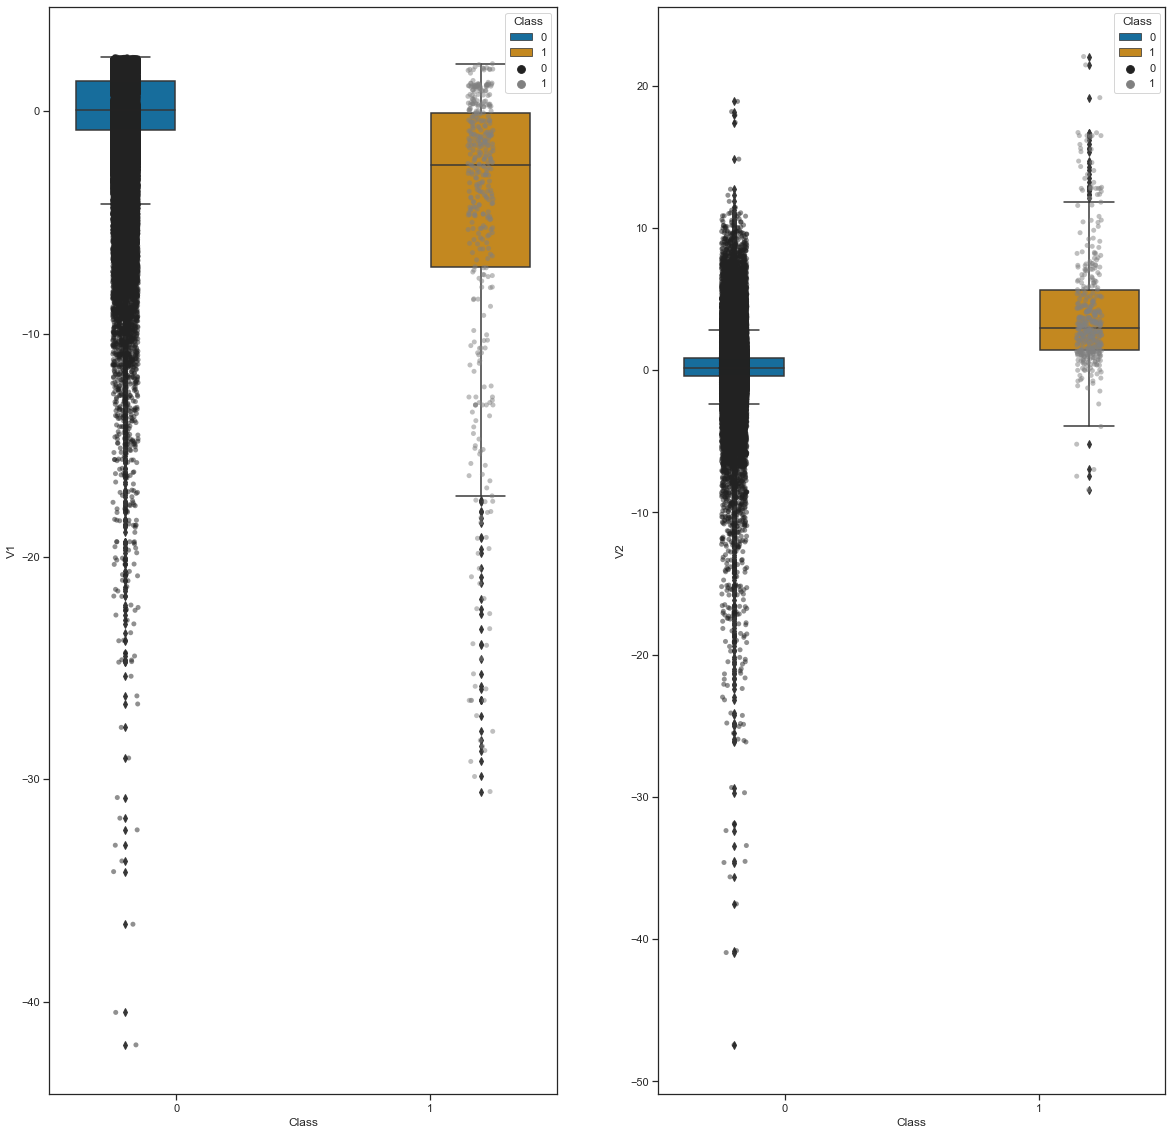

In [244]:
cols = ['V1','V2']

f, axes = plt.subplots(1,2, figsize=(20, 20), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=df, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=df,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

### Histogram:  
They can be used to identify outliers, identify how normal a dataset is, and whether there are potential gaps in your dataset, along with other applications.

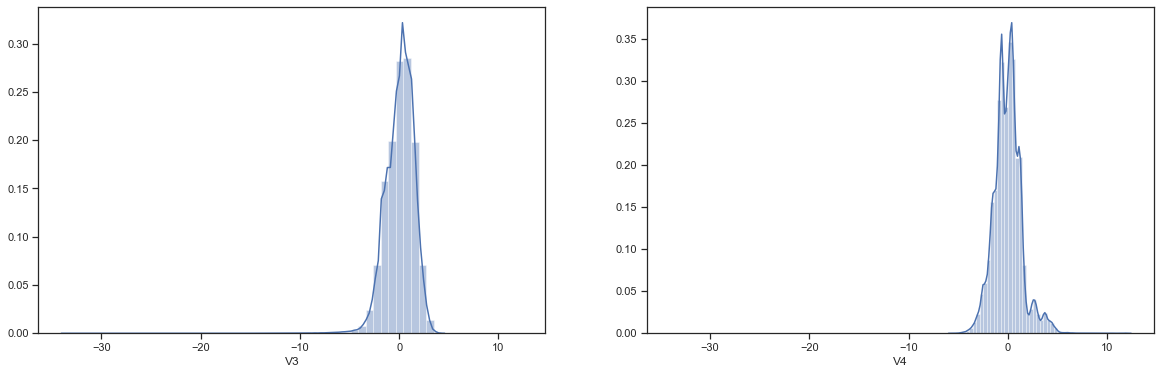

In [246]:
f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.distplot(df['V3'],ax=axes[0])
sns.distplot(df['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

### Jointplot:  
While histograms are useful to view, they are still ostensively univatiate in nature, meaning they only show the distribution of one variable at a time.

When we want to compare two variables distributions at a time in Python, we can use the joint plot function.

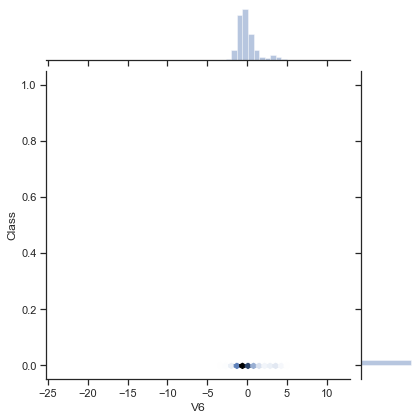

In [249]:
sns.jointplot(y='Class',x='V6',data=df,kind='hex')

### Scatter Plots:
Gives a rough idea of range of failures/successes for a particular statistic

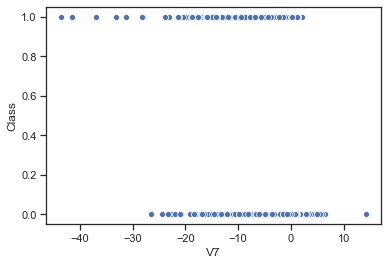

In [250]:
sns.scatterplot(x="V7", y="Class",data=df)

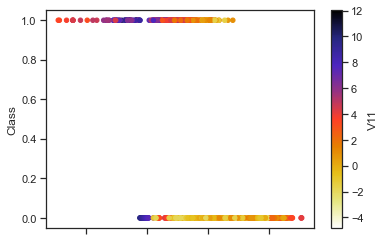

In [251]:
df.plot.scatter(x='V10',y='Class',c='V11',colormap='CMRmap_r')

### Pair Plots:
Pair plots can play a similar role to individual scatter plots as they provide a variety of visualizations

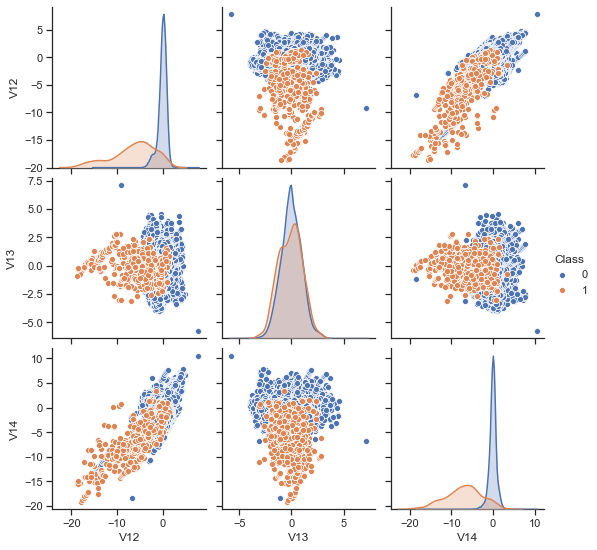

In [187]:
sns.set(style="ticks")
sns.pairplot(df[["V12","V13","V14","Class"]], hue="Class")

### Amount Comparison
How different is the amount of money used in different transaction classes?

In [291]:
df = pd.read_csv("creditcard.csv")
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)

nan_mean = df.isna().mean()
nan_mean = nan_mean[nan_mean != 0].sort_values()
nan_mean

df_fraud = df[df['Class'] == 1]
df_ok = df[df['Class'] == 0]

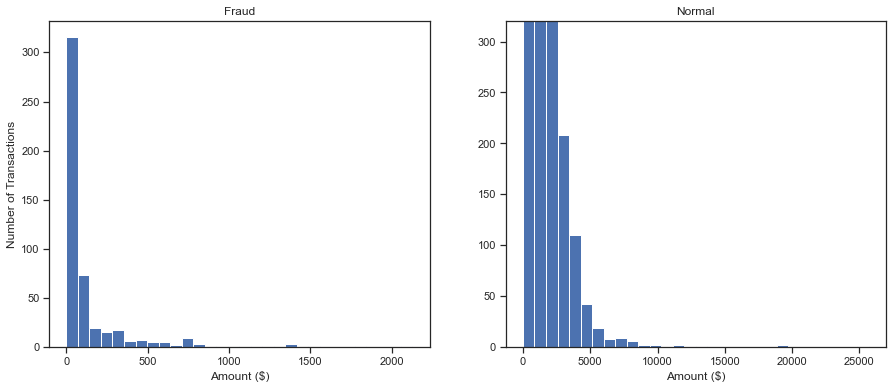

In [292]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df_fraud['Amount'], bins=bins)
ax2.hist(df_ok['Amount'], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Amount ($)')
ax2.set_xlabel('Amount ($)')
ax1.set_ylabel('Number of Transactions')

ax2.set_ylim(0, 320)
plt.show()


### Time Comparison  
Do fraudulent transactions occur more often during a certain frames?

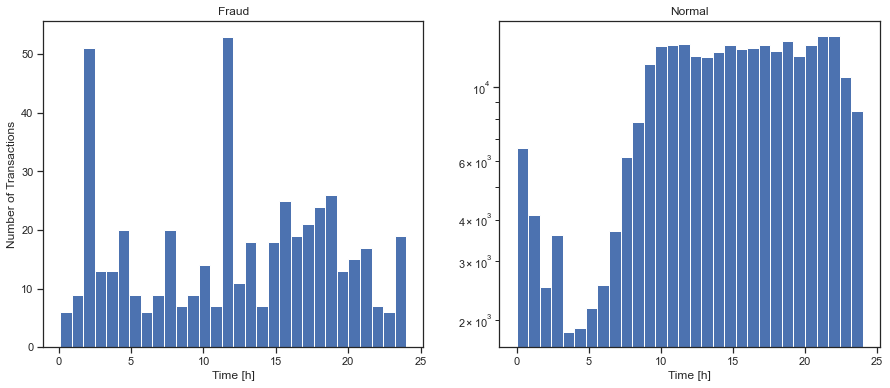

In [293]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df_fraud['Time'], bins=bins)
ax2.hist(df_ok['Time'], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Time [h]')
ax2.set_xlabel('Time [h]')
ax1.set_ylabel('Number of Transactions')

ax2.set_yscale('log')
plt.show()


## Conclusion:
We Hence conclude the Visualization Part of the Descriptive Analytics.

## Outlier Detection Procedures

### Graphical Outlier Detection Procedures

OLAP Cube for Fraud Detection

   1. Roll-up
   2. Drill-Down
   3. Slicing
   4. Dicing

For this procedure we do not use a Graphical Outlier Detection using Seaborn

### Statistical Outlier Detection Procedures

We drop all rows that satisfy this condition

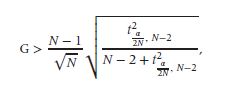

In [256]:
N = len(df)
t2 = (t.ppf(0.05, N-2))**2
G = ((N-1)/(N**0.5)) * np.sqrt(t2/(t2 + N - 2))
print( "We drop all values with Z-value > " + str(G) )

We drop all values with Z-value > 1.6448507553141443


In [257]:
p_value = norm.sf(abs(G)) 
max_amount = df.Amount.quantile(1-p_value)
print("Therefore we remove top " + str(p_value*100) + "%ile of the df")
print("The value above which we discard = " + str(max_amount))

Therefore we remove top 5.000029616885424%ile of the df
The value above which we discard = 109.97999999999999


In [258]:
index_names = df[ df['Amount'] > max_amount ].index
# drop these row indexes from dataFrame
df.drop(index_names, inplace = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


### Break-Point Analysis

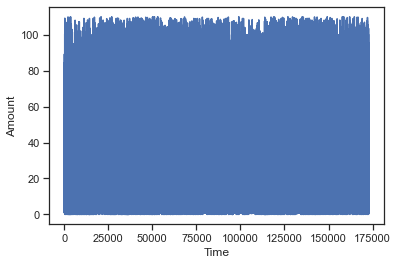

In [259]:
timed_df = df.groupby('Time')['Amount'].mean().reset_index()
sns.lineplot(data = timed_df, x = 'Time', y = 'Amount')

### We see no observable conclusions in Break-Point Analysis

### Association Rule Analysis

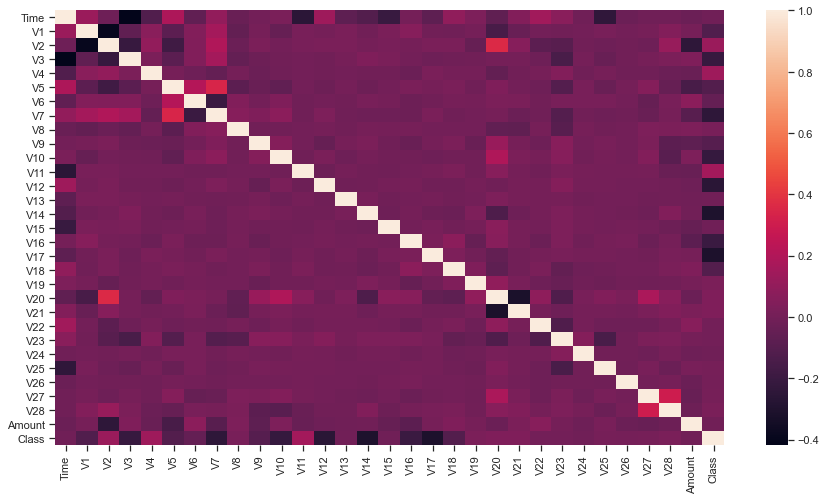

In [260]:
f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

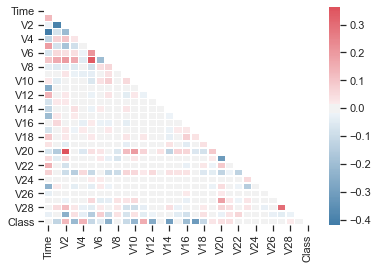

In [261]:
corr = df.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)
# Plotting the heatmap
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center = 0)

### From these 2 graphs we notice no observable considerable correlations that need to be adressed

## Conclusion:
We get a really good dataset on which we can operate on!

## Clustering

The aim of clustering is to split up a set of observations into segments such that the homogeneity within a segment is maximized (cohesive), and the heterogeneity between segments is maximized (separated) (Everitt, Landau et al. 2010).

### T-distributed stochastic neighbor embedding (t-SNE)

Here for clustering we use a t-distributed stochastic neighbor embedding (t-SNE) which is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. 
Although this particular case we have directly clustered without PCA

### Part I:
Clustering using TSNE without PCA

An unsupervised approach to detect frauds, the only place the labels are used is to evaluate the algorithm.   
One of the biggest challenge of this problem is that the target is highly imbalanced as only <1% cases are fraudulent transactions.   
But the advantage of the representation learning approach is that it is still able to handle such imbalance nature of the problems.   
Using TSNE we can try to see how the transactions are similar!

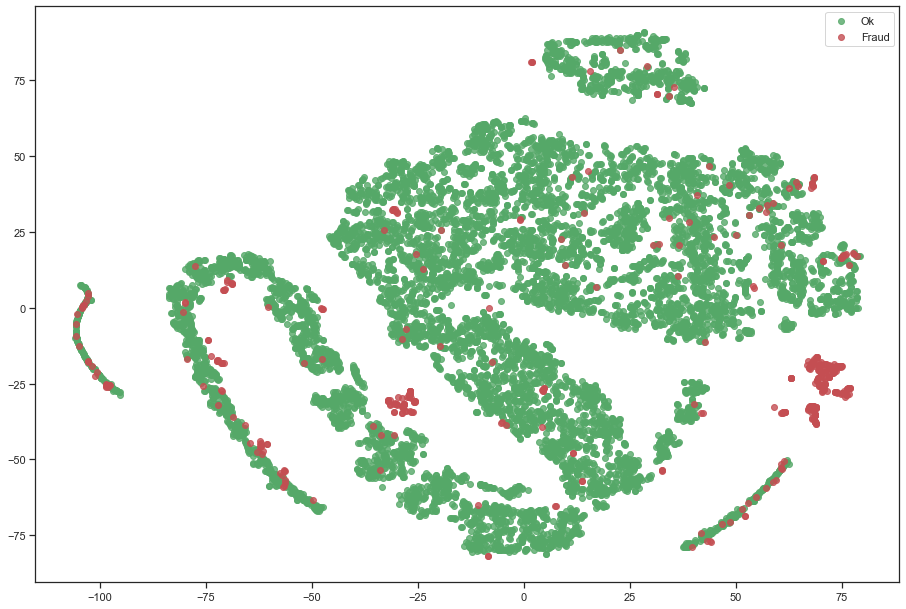

In [294]:
ok_sample = df[df['Class'] == 0].sample(10000)
df_tsne = ok_sample.append(df_fraud).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.drop(['Class'], axis = 1).values
y_tsne = df_tsne["Class"].values


tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth='1', alpha=0.8, label='Ok')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')
ax.legend(loc='best')

The main idea of this approach is to compress the data making a "latent representation" and then reconstruct the data.   
If a sample is similar to the rest of the dataset, the reconstructed data will be similar or even equal to the original data.   
However, if the sample is not similar to the rest, the reconstructed sample will not be similar to the original one. In short, we compress the data and reconstruct it. If the reconstructed data is not similar to the original one, we have a fraud.

### Part II: 
Clustering using TSNE with PCA

#### Creating X and y for PCA

In [273]:
X = df.drop('Class', axis=1)
y = df['Class']

#### We use a 80-20 split for test train for the PCA

In [274]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((227845, 30), (56962, 30))

In [269]:
scores = []
for n in range(2, 31):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_tt = pca.transform(X_train)
    X_dt = pca.inverse_transform(X_tt)
    
    scores.append(mean_squared_error(X_train, X_dt))
scores = np.array(scores)
print(scores.argmin() + 2)

30


We get the best N for number of components as n = 30,
however we need to reduce the number of components so we take n = 10

In [321]:
n_components = 5
pca = PCA(n_components=n_components)

pca.fit(X_train)

PCA(n_components=5)

#### Training the model

In [322]:
X_tt = pca.transform(X_train)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_train.columns, index=X_train.index)

reconstruction_score = []
for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

Text(0, 0.5, 'Number of samples')

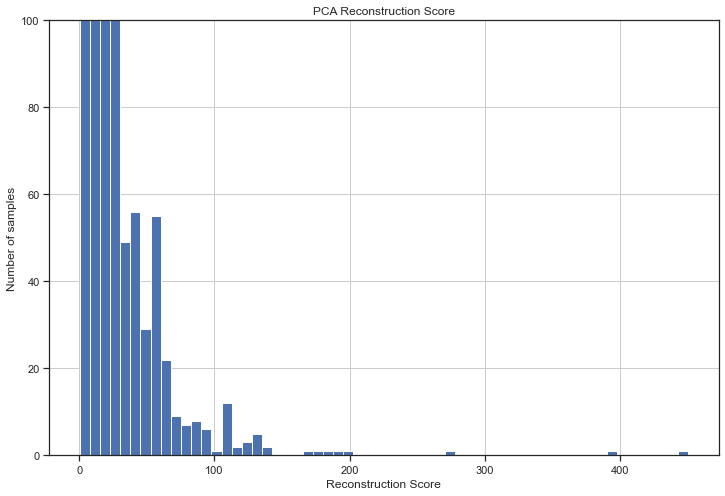

In [323]:
plt.figure(figsize=(12, 8))
rc_scores['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('PCA Reconstruction Score')
plt.xlabel('Reconstruction Score')
plt.ylabel('Number of samples')

In [324]:
pred = pd.DataFrame(index=X_train.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1

print(classification_report(y_train, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_train) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.11      0.60      0.19       394

    accuracy                           0.99    227845
   macro avg       0.56      0.80      0.59    227845
weighted avg       1.00      0.99      0.99    227845

Rate of transations to investigate: 0.9076345761372864 %


#### Val Eval

In [325]:
X_tt = pca.transform(X_val)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_val.columns, index=X_val.index)

reconstruction_score = []
for idx in X_val.index:
    score = mean_squared_error(X_val.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_val.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
val_fraud_index = list(y_val[y_val == 1].index)

In [326]:
pred = pd.DataFrame(index=X_val.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1
    
print(classification_report(y_val, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_val) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.11      0.65      0.19        98

    accuracy                           0.99     56962
   macro avg       0.56      0.82      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Rate of transations to investigate: 1.0024226677434078 %


### TSNE from PCA representation

We can see that most samples have a low reconstruction score and then, probably most frauds have more then 50 reconstruction score. Using TSNE we can compare the original data disposition with the PCA compressed data distribution.

In [327]:
X_pca_tsne = pca.transform(X_train)
X_pca_tsne = pd.DataFrame(X_pca_tsne, index=X_train.index)

X_pca_tsne['Class'] = y_train
ok_sample = X_pca_tsne[X_pca_tsne['Class'] == 0].sample(10000)
df_fraud = X_pca_tsne[X_pca_tsne['Class'] == 1]
df_tsne = ok_sample.append(df_fraud).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

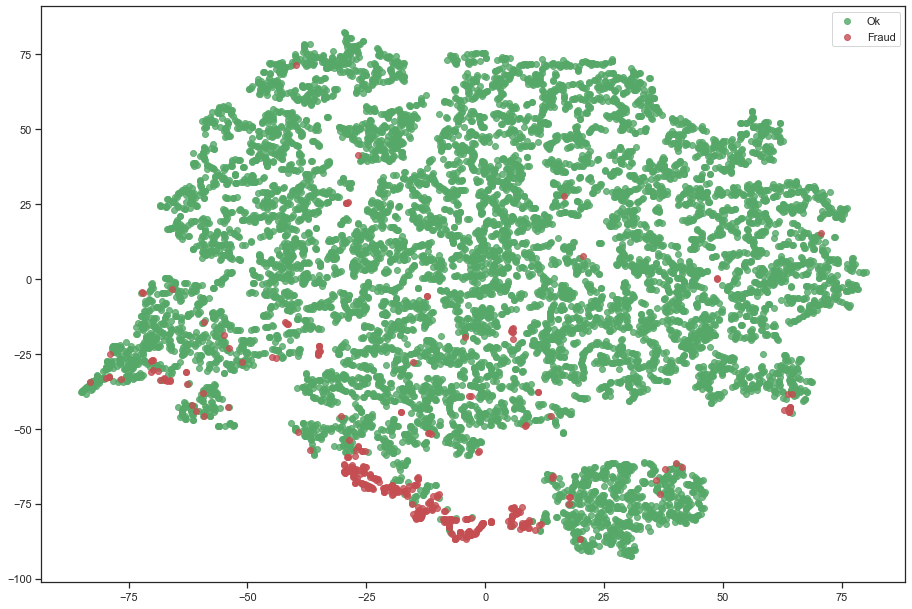

In [328]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth='1', alpha=0.8, label='Ok')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')
ax.legend(loc='best')

### Part III:
Using AutoEncoder

An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.  The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal "noise". It is composed of a enconding part responsable to compress the data and a decoder to reconstruct the data.

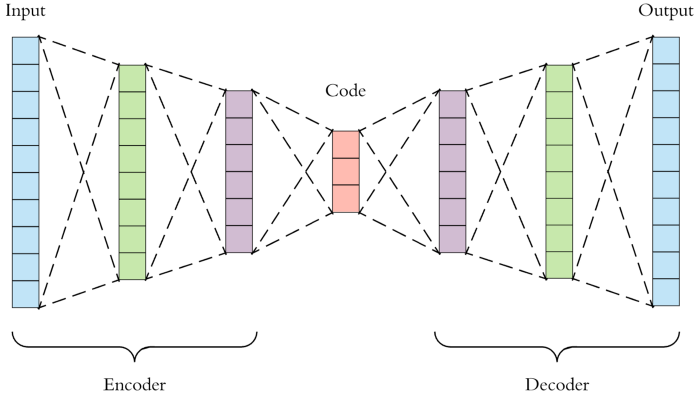

In [329]:
ss = StandardScaler()
X_tscaled = ss.fit_transform(X_train.values)
X_train = pd.DataFrame(X_tscaled, columns=X_train.columns, index=X_train.index)

X_vscaled = ss.transform(X_val.values)
X_val = pd.DataFrame(X_vscaled, columns=X_val.columns, index=X_val.index)

In [330]:
# Input
inp = Input(shape=(X.shape[1],))

In [331]:
# Encoder
x = Dense(100, activation='relu')(inp)
x = Dense(50, activation='relu')(x)

In [332]:
# Decoder
x = Dense(50, activation='tanh')(x)
x = Dense(100, activation='tanh')(x)

In [333]:
## output
output = Dense(X.shape[1], activation='relu')(x)

autoencoder = Model(inp, output)

lr = 0.0001
epochs = 300
adam = Adam(lr=lr, decay=(lr/epochs))

autoencoder.compile(optimizer=adam, loss="mean_squared_error")
autoencoder.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_19 (Dense)             (None, 30)                3030      
Total params: 18,830
Trainable params: 18,830
Non-trainable params: 0
__________________________________________________

In [308]:
history = autoencoder.fit(X_train.values, X_train.values, batch_size=2048, epochs=epochs,
                          shuffle=True, verbose=0)

Text(0.5, 1.0, 'Training and validation loss')

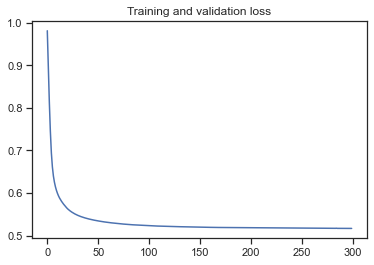

In [309]:
loss = history.history['loss']

ts = range(epochs)

plt.plot(ts, loss)
plt.title('Training and validation loss')

In [310]:
encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.add(autoencoder.layers[1])
encoder.add(autoencoder.layers[2])

decoder = Sequential()
decoder.add(autoencoder.layers[3])
decoder.add(autoencoder.layers[4])
decoder.add(autoencoder.layers[5])

#### Training the Model

In [334]:
X_tt = encoder.predict(X_train)
X_dt = decoder.predict(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_train.columns, index=X_train.index)

reconstruction_score = []
for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()
rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

In [335]:
pred = pd.DataFrame(index=X_train.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1
    
print(classification_report(y_train, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_train) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.17      0.58      0.27       394

    accuracy                           0.99    227845
   macro avg       0.59      0.79      0.63    227845
weighted avg       1.00      0.99      1.00    227845

Rate of transations to investigate: 0.5727577958699994 %


Text(0, 0.5, 'Number of samples')

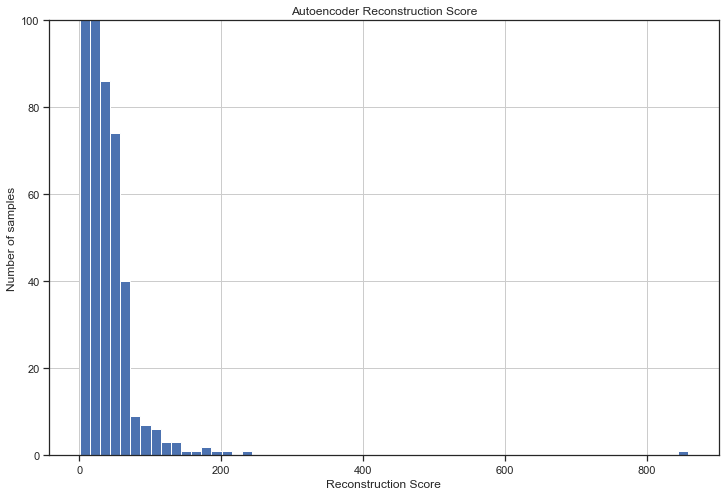

In [314]:
plt.figure(figsize=(12, 8))
rc_scores['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('Autoencoder Reconstruction Score')
plt.xlabel('Reconstruction Score')
plt.ylabel('Number of samples')

The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Analogously to the PCA approach, the reconstrcution score histogram can be seen below:

#### Val Eval

In [315]:
X_tt = encoder.predict(X_val)
X_dt = decoder.predict(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_val.columns, index=X_val.index)

reconstruction_score = []
for idx in X_val.index:
    score = mean_squared_error(X_val.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_val.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()
rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

In [316]:
pred = pd.DataFrame(index=X_val.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred['fraud'].loc[x] = 1

print(classification_report(y_val, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_val) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.66      0.22        98

    accuracy                           0.99     56962
   macro avg       0.57      0.83      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Rate of transations to investigate: 0.8532003792001684 %


### TSNE with AutoEncoder!

We can see that most samples have a low reconstruction score and then, probably most frauds have more then ~60 reconstruction score. Using TSNE we can compare the original data disposition with the Autoencoder compressed data distribution.

In [319]:
X_enc_tsne = encoder.predict(X_train)
X_enc_tsne = pd.DataFrame(X_enc_tsne, index=X_train.index)

X_enc_tsne['Class'] = y_train
ok_sample = X_enc_tsne[X_enc_tsne['Class'] == 0].sample(10000)
df_fraud = X_enc_tsne[X_enc_tsne['Class'] == 1]
df_tsne = ok_sample.append(df_fraud).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

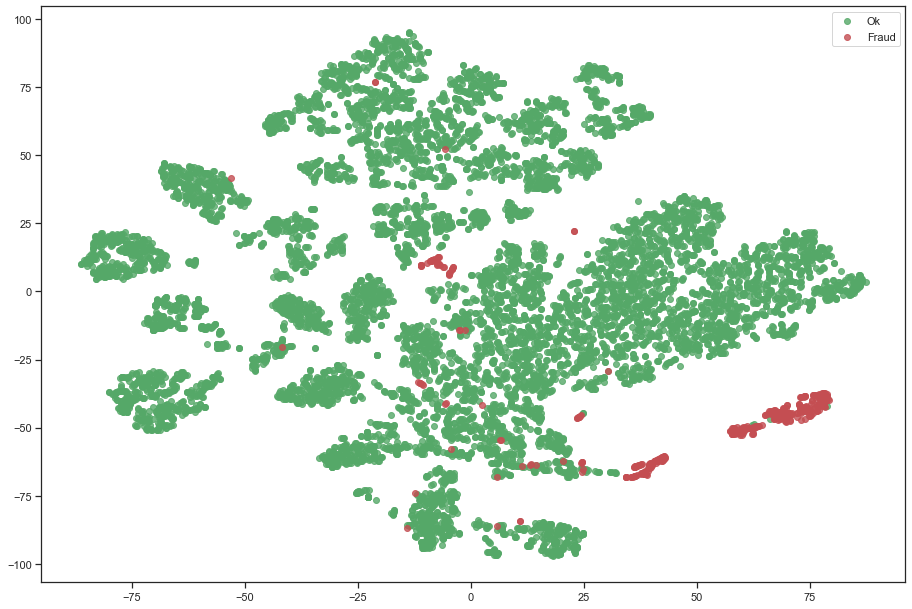

In [320]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth='1', alpha=0.8, label='Ok')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')
ax.legend(loc='best')

## Conclusion

It is thus possible to detect frauds with an 100% unsupervised approach. Nevertheless, there are several ways to make this approach work better!

References:
1. Fraud Analytics using Descriptive, Predictive and Social Network Techniques
 - Bart Baesens, Veronique Van Vlasselaer, Wouter Verbeke
2. https://github.com/lmeazzini/Small-projects/blob/master/Credit_fraud.ipynb
3. https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
4. https://www.kaggle.com/franckepeixoto/fraud-detection-exploratory-data-analysis-eda